In [25]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import oommfpy as op
import os
import shutil

In [35]:
omfs = glob.glob('sims/oommf/m_random_FeGe_Lx1000nm_Ly100nm_Lz1000nm/m_random_FeGe/*.omf')
# omfs = sorted(omfs, key=lambda f: int(re.search(r'(?<=m_Bz)\d+', f).group(0)))

In [36]:
omfs

['sims/oommf/m_random_FeGe_Lx1000nm_Ly100nm_Lz1000nm/m_random_FeGe/m_SEED42-Oxs_MinDriver-Magnetization-00-0143346.omf',
 'sims/oommf/m_random_FeGe_Lx1000nm_Ly100nm_Lz1000nm/m_random_FeGe/m_SEED424242-Oxs_MinDriver-Magnetization-00-0131587.omf',
 'sims/oommf/m_random_FeGe_Lx1000nm_Ly100nm_Lz1000nm/m_random_FeGe/m_SEED4242-Oxs_MinDriver-Magnetization-00-0082427.omf']

In [4]:
c_maps = []

for i, omf in enumerate(omfs): 

    data = op.MagnetisationData(omfs[i])
    data.generate_coordinates()
    data.generate_field()
    
    fltr = data.z == data.zs[len(data.zs) // 2]
    _map = data.field_z[fltr].reshape(len(data.xs), -1)
    c_maps.append(np.copy(_map))

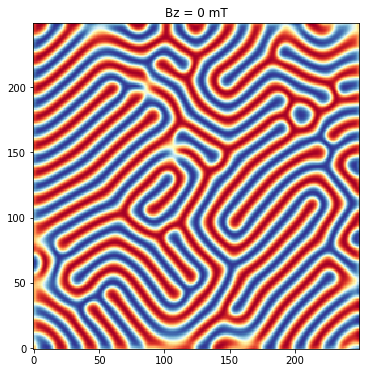

In [5]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

for idx, i in enumerate([0]):
    # ax = axs.flatten()[idx]
    ax.imshow(c_maps[idx], origin='lower', vmin=-1, vmax=1, cmap='RdYlBu')
    ax.set_title('Bz = {} mT'.format(i))

# Field sweep Bz: 0 -> 400 mT

## Seed: 42

In [16]:
omfs = glob.glob('sims/oommf/m_random_FeGe_Lx1000nm_Ly100nm_Lz1000nm/field_sweep_SEED42_Bz_0mT_400mT/*.omf')
omfs = sorted(omfs, key=lambda f: int(re.search(r'(?<=Magnetization-)\d{6}', f).group(0)))

In [18]:
bw_maps = []

for i, omf in enumerate(omfs): 

    data = op.MagnetisationData(omfs[i])
    data.generate_coordinates()
    data.generate_field()
    
    av_map = np.zeros((len(data.ys), len(data.xs)))
    for j, z in enumerate(data.zs):
        fltr = data.z == data.zs[j]
        av_map += data.field_z[fltr].reshape(len(data.ys), -1)
    av_map /= len(data.zs)
        
    bw_maps.append(np.copy(av_map))

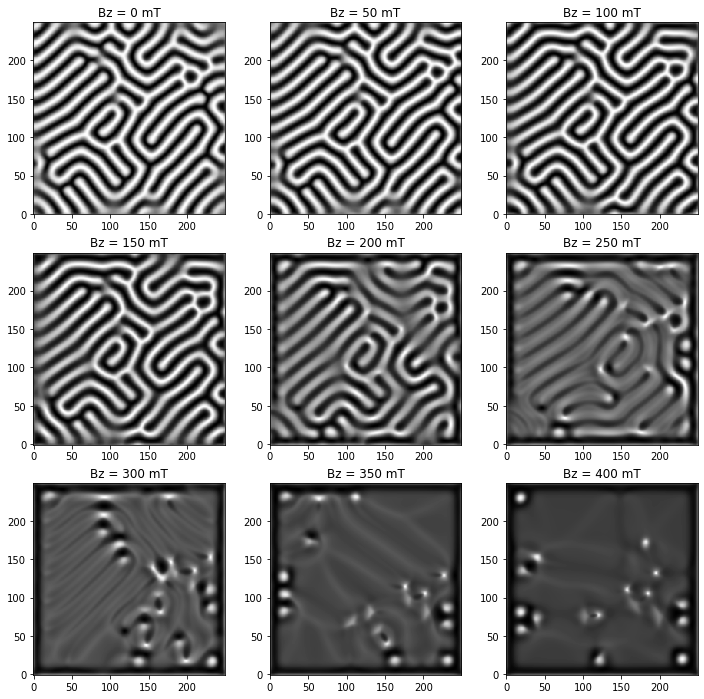

In [23]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for idx, i in enumerate([0, 25, 50, 75, 100, 125, 150, 175, 200]):
    ax = axs.flatten()[idx]
    ax.imshow(bw_maps[i], origin='lower', vmin=-1, vmax=1, cmap='binary')
    ax.set_title('Bz = {} mT'.format(2 * i))

In [28]:
DIR = 'data_mz_m-random_SEED42_field_sweep_Bz_0mT_400mT_step_2mT'

if not os.path.exists(DIR):
    os.makedirs(DIR)

for idx, i in enumerate(range(200)):
    np.savetxt(DIR + '/m_Bz_{:06d}_mT.txt'.format(2 * i), bw_maps[i])

## Seed: 424242

In [40]:
omfs = glob.glob('sims/oommf/m_random_FeGe_Lx1000nm_Ly100nm_Lz1000nm/field_sweep_SEED424242_Bz_0mT_400mT/*.omf')
omfs = sorted(omfs, key=lambda f: int(re.search(r'(?<=Magnetization-)\d{6}', f).group(0)))

In [41]:
bw_maps = []

for i, omf in enumerate(omfs): 

    data = op.MagnetisationData(omfs[i])
    data.generate_coordinates()
    data.generate_field()
    
    av_map = np.zeros((len(data.ys), len(data.xs)))
    for j, z in enumerate(data.zs):
        fltr = data.z == data.zs[j]
        av_map += data.field_z[fltr].reshape(len(data.ys), -1)
    av_map /= len(data.zs)
        
    bw_maps.append(np.copy(av_map))

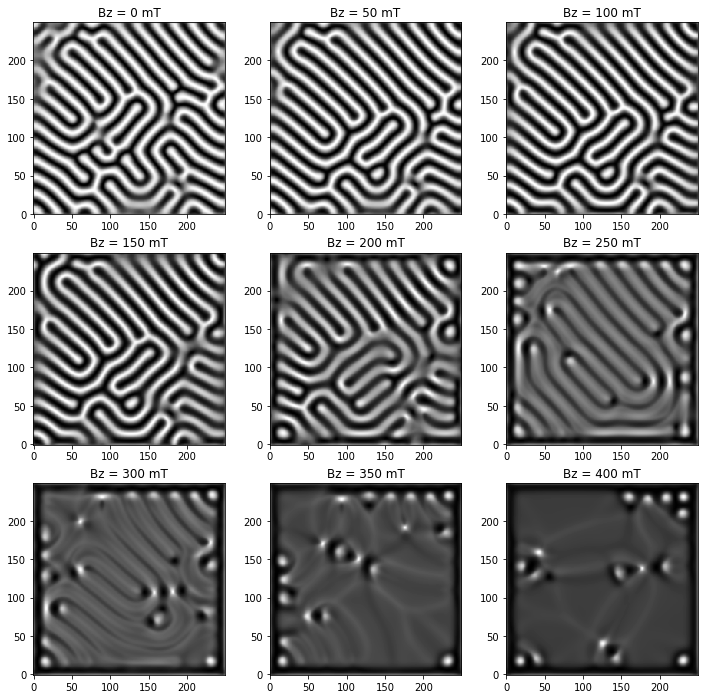

In [42]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for idx, i in enumerate([0, 25, 50, 75, 100, 125, 150, 175, 200]):
    ax = axs.flatten()[idx]
    ax.imshow(bw_maps[i], origin='lower', vmin=-1, vmax=1, cmap='binary')
    ax.set_title('Bz = {} mT'.format(2 * i))

# Field sweep By: 0 -> 400 mT

## Seed: 42

In [29]:
omfs = glob.glob('sims/oommf/m_random_FeGe_Lx1000nm_Ly100nm_Lz1000nm/field_sweep_SEED42_By_0mT_400mT/*.omf')
omfs = sorted(omfs, key=lambda f: int(re.search(r'(?<=Magnetization-)\d{6}', f).group(0)))

In [31]:
bw_maps = []

for i, omf in enumerate(omfs): 

    data = op.MagnetisationData(omfs[i])
    data.generate_coordinates()
    data.generate_field()
    
    av_map = np.zeros((len(data.ys), len(data.xs)))
    for j, z in enumerate(data.zs):
        fltr = data.z == data.zs[j]
        av_map += data.field_z[fltr].reshape(len(data.ys), -1)
    av_map /= len(data.zs)
        
    bw_maps.append(np.copy(av_map))

In [32]:
DIR = 'data_mz_m-random_SEED42_field_sweep_By_0mT_400mT_step_2mT'

if not os.path.exists(DIR):
    os.makedirs(DIR)

for idx, i in enumerate(range(200)):
    np.savetxt(DIR + '/m_By_{:06d}_mT.txt'.format(2 * i), bw_maps[i])

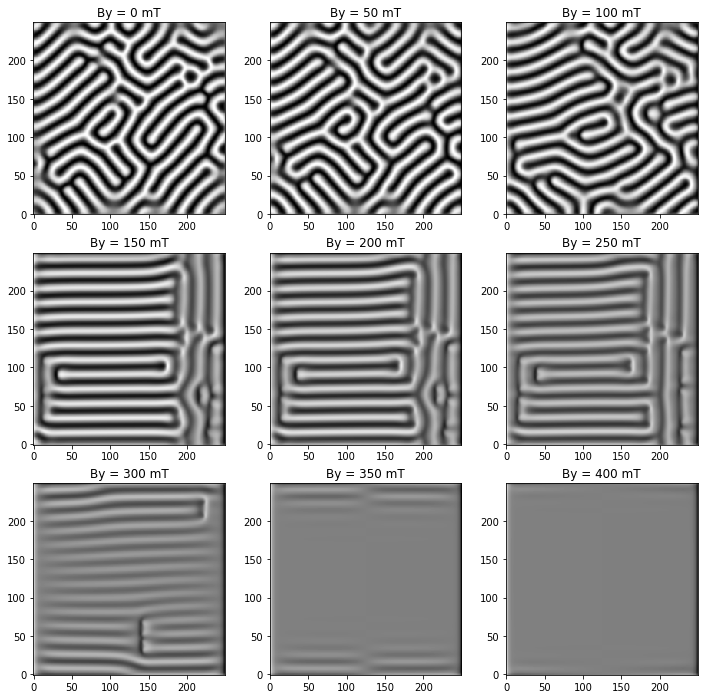

In [34]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for idx, i in enumerate([0, 25, 50, 75, 100, 125, 150, 175, 200]):
    ax = axs.flatten()[idx]
    ax.imshow(bw_maps[i], origin='lower', vmin=-1, vmax=1, cmap='binary')
    ax.set_title('By = {} mT'.format(2 * i))

## Seed: 424242

In [43]:
omfs = glob.glob('sims/oommf/m_random_FeGe_Lx1000nm_Ly100nm_Lz1000nm/field_sweep_SEED42_By_0mT_400mT/*.omf')
omfs = sorted(omfs, key=lambda f: int(re.search(r'(?<=Magnetization-)\d{6}', f).group(0)))

In [44]:
bw_maps = []

for i, omf in enumerate(omfs): 

    data = op.MagnetisationData(omfs[i])
    data.generate_coordinates()
    data.generate_field()
    
    av_map = np.zeros((len(data.ys), len(data.xs)))
    for j, z in enumerate(data.zs):
        fltr = data.z == data.zs[j]
        av_map += data.field_z[fltr].reshape(len(data.ys), -1)
    av_map /= len(data.zs)
        
    bw_maps.append(np.copy(av_map))

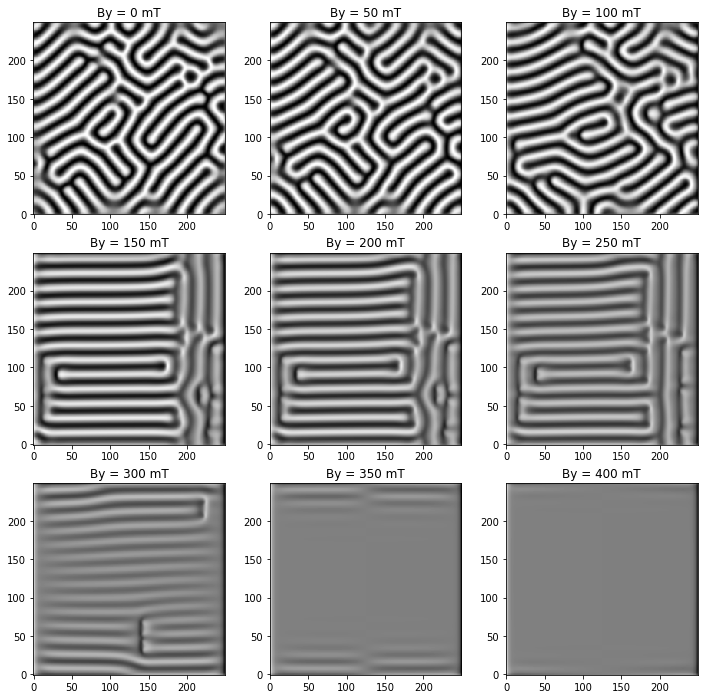

In [45]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for idx, i in enumerate([0, 25, 50, 75, 100, 125, 150, 175, 200]):
    ax = axs.flatten()[idx]
    ax.imshow(bw_maps[i], origin='lower', vmin=-1, vmax=1, cmap='binary')
    ax.set_title('By = {} mT'.format(2 * i))